<a href="https://colab.research.google.com/github/AaliyanShuja/DEP/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/content/MagicBricks.csv')
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [3]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [5]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [10]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)

In [7]:
df.dropna(subset=['Bathroom'], inplace=True)

In [9]:
df.dropna(subset=['Furnishing'], inplace=True)

In [11]:
df.dropna(subset=['Parking'], inplace=True)

In [12]:
df.dropna(subset=['Type'], inplace=True)
df.dropna(subset=['Per_Sqft'], inplace=True)

In [13]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


<Axes: xlabel='Area', ylabel='Price'>

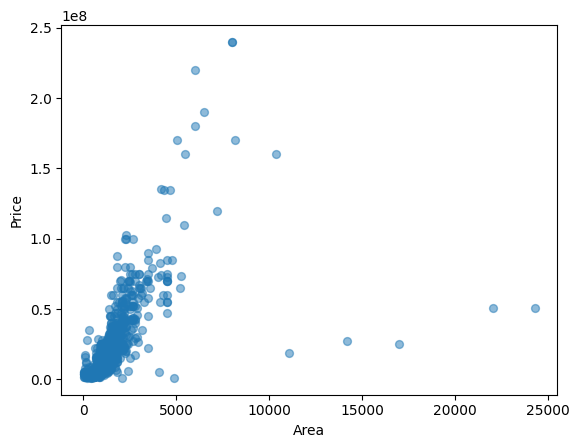

In [14]:
df.plot(kind='scatter', x='Area', y='Price', s=32, alpha=0.5)

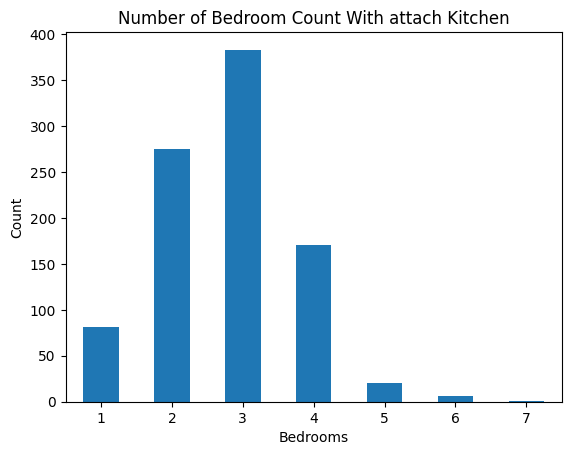

In [15]:
bedrooms_count = df['BHK'].value_counts()
bedrooms_count_sorted=bedrooms_count.sort_index()
bedrooms_count_sorted.plot(kind='bar')
plt.title('Number of Bedroom Count With attach Kitchen')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

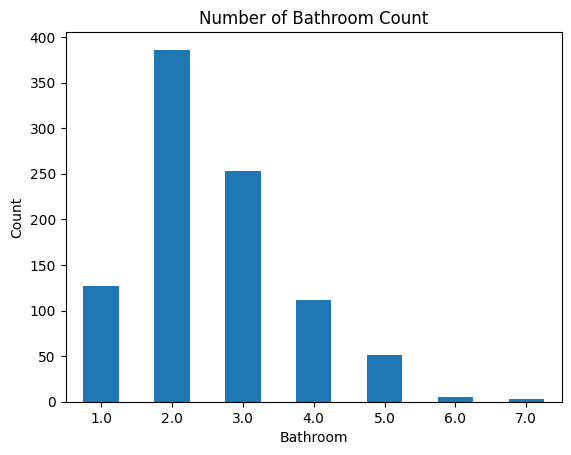

In [16]:
bathrooms_count = df['Bathroom'].value_counts()
bathrooms_count_sorted=bathrooms_count.sort_index()
bathrooms_count_sorted.plot(kind='bar')
plt.title('Number of Bathroom Count')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

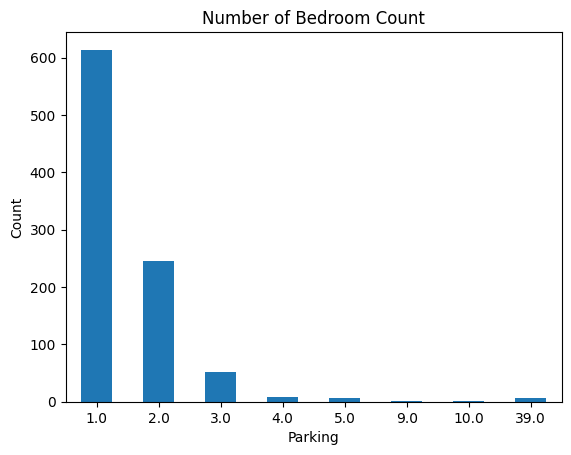

In [17]:
parking_count = df['Parking'].value_counts()
parking_count_sorted=parking_count.sort_index()
parking_count_sorted.plot(kind='bar')
plt.title('Number of Bedroom Count')
plt.xlabel('Parking')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

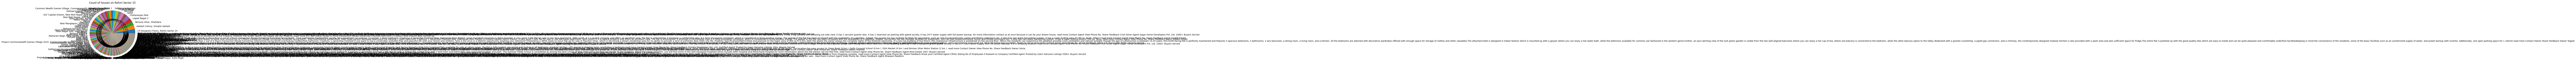

In [21]:
locality_count = df['Locality'].value_counts()
locality_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Count of houses on Rohini Sector 25')
plt.show()

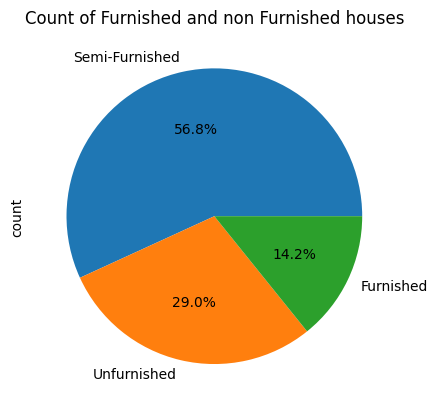

In [19]:
furnishing_count = df['Furnishing'].value_counts()
furnishing_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Count of Furnished and non Furnished houses')
plt.show()

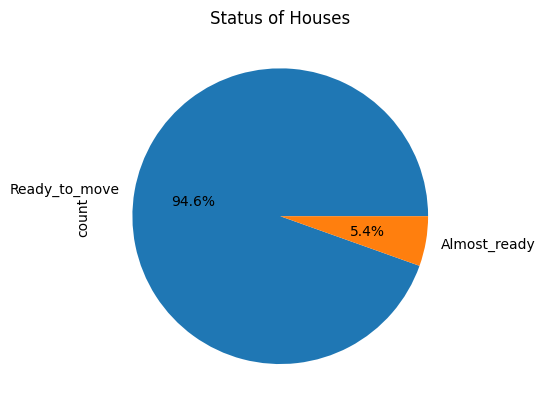

In [22]:
status_count = df['Status'].value_counts()
status_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Status of Houses')
plt.show()

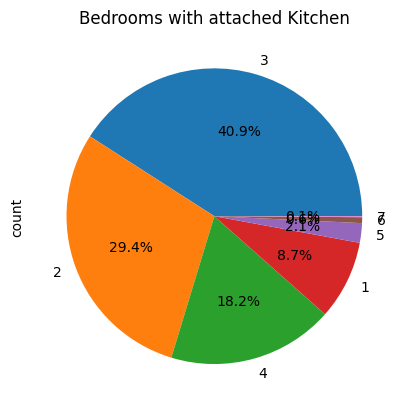

In [23]:
bhk_count = df['BHK'].value_counts()
bhk_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Bedrooms with attached Kitchen')
plt.show()

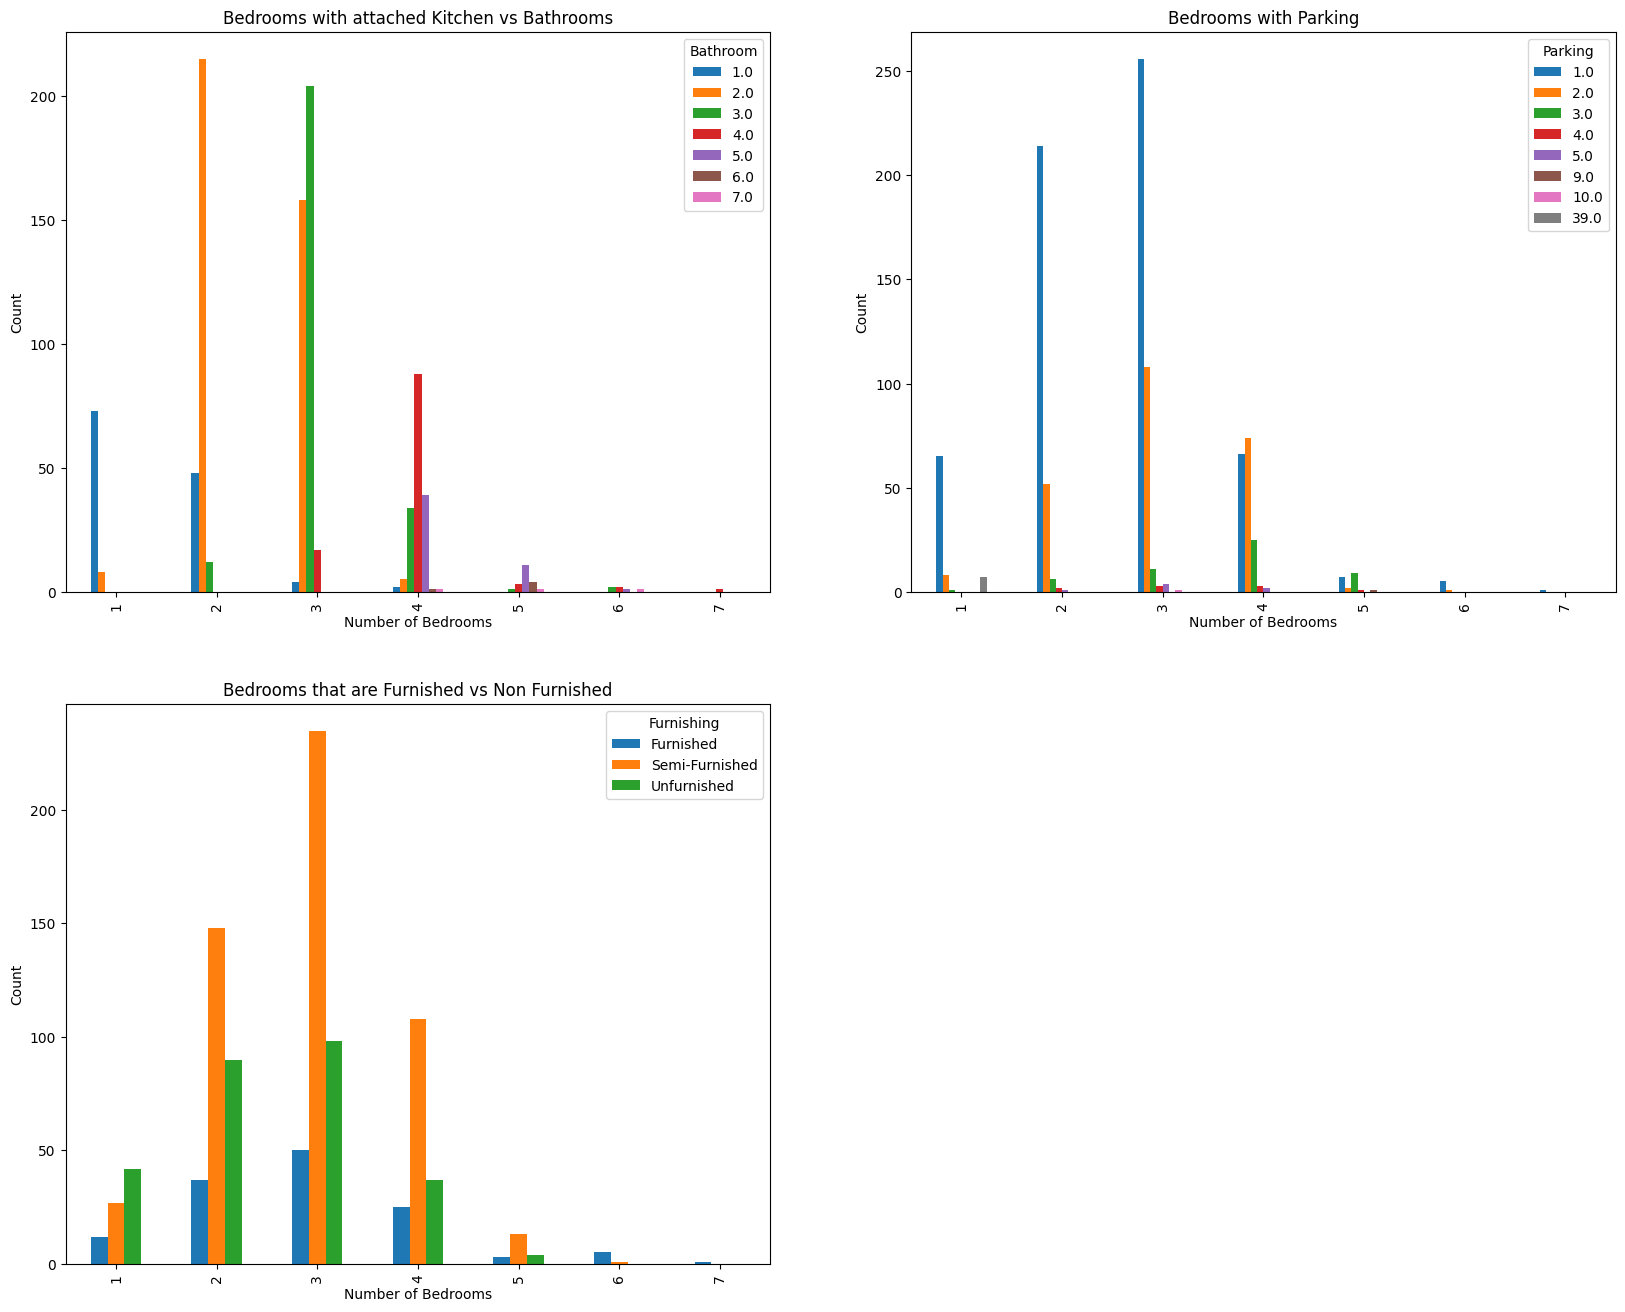

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,16))
bedrooms_bathrooms =pd.crosstab(df['BHK'], df['Bathroom'])
bedrooms_bathrooms.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Bedrooms with attached Kitchen vs Bathrooms')
axes[0,0].set_xlabel('Number of Bedrooms')
axes[0,0].set_ylabel('Count')

bedrooms_parking = pd.crosstab(df['BHK'], df['Parking'])
bedrooms_parking.plot(kind='bar', ax= axes[0,1])
axes[0,1].set_title('Bedrooms with Parking')
axes[0,1].set_xlabel('Number of Bedrooms')
axes[0,1].set_ylabel('Count')

bedrooms_furnishing = pd.crosstab(df['BHK'], df['Furnishing'])
bedrooms_furnishing.plot(kind='bar', ax= axes[1,0])
axes[1,0].set_title('Bedrooms that are Furnished vs Non Furnished')
axes[1,0].set_xlabel('Number of Bedrooms')
axes[1,0].set_ylabel('Count')
axes[1,1].axis('off')

plt.xticks(rotation=0)
plt.show()

In [25]:
encoder = LabelEncoder()

In [26]:
encoding_col = ['Furnishing', 'Status', 'Locality', 'Type','Transaction']
for col in encoding_col:
  df[col] = encoder.fit_transform(df[col])

In [27]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,1,111,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,42,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,233,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,234,1.0,6200000,1,0,1,6667.0
5,1300.0,4,3.0,1,233,1.0,15500000,1,0,1,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,2,37,3.0,55000000,1,0,1,12916.0
1255,1050.0,3,2.0,1,37,3.0,12500000,1,1,1,12916.0
1256,875.0,3,3.0,1,37,3.0,17500000,1,0,1,12916.0
1257,990.0,2,2.0,2,38,1.0,11500000,1,1,1,12916.0


In [28]:
df = df.dropna(subset=["Per_Sqft",'Area','BHK','Furnishing','Locality','Status','Transaction','Type'])

In [29]:
x=df.drop(['Price'], axis=1)
y=df['Price']

In [30]:
print(x)

         Area  BHK  Bathroom  Furnishing  Locality  Parking  Status  \
1       750.0    2       2.0           1       111      1.0       1   
2       950.0    2       2.0           0        42      1.0       1   
3       600.0    2       2.0           1       233      1.0       1   
4       650.0    2       2.0           1       234      1.0       1   
5      1300.0    4       3.0           1       233      1.0       1   
...       ...  ...       ...         ...       ...      ...     ...   
1254   4118.0    4       5.0           2        37      3.0       1   
1255   1050.0    3       2.0           1        37      3.0       1   
1256    875.0    3       3.0           1        37      3.0       1   
1257    990.0    2       2.0           2        38      1.0       1   
1258  11050.0    3       3.0           2        37      1.0       1   

      Transaction  Type  Per_Sqft  
1               0     0    6667.0  
2               1     0    6667.0  
3               1     1    6667.0  
4  

In [31]:
scalar = MinMaxScaler()
x = scalar.fit_transform(x)
y= scalar.fit_transform(y.values.reshape(-1,1))

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
In_model = LinearRegression()
In_model.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred= In_model.predict(x_test)

In [35]:
mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

In [36]:
mae

0.04653684826989169

In [37]:
mse

0.008542976049412815

In [38]:
r2

0.5316778265390435

In [39]:
categorical_columns= ['Furnishing', 'Status', 'Locality', 'Type','Transaction']
housing_data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
housing_data_encoded.head()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Furnishing_1,Furnishing_2,Status_1,Locality_1,...,Locality_296,Locality_297,Locality_298,Locality_299,Locality_300,Locality_301,Locality_302,Locality_303,Type_1,Transaction_1
1,750.0,2,2.0,1.0,5000000,6667.0,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,950.0,2,2.0,1.0,15500000,6667.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,600.0,2,2.0,1.0,4200000,6667.0,True,False,True,False,...,False,False,False,False,False,False,False,False,True,True
4,650.0,2,2.0,1.0,6200000,6667.0,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
5,1300.0,4,3.0,1.0,15500000,6667.0,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [40]:
df.dropna(subset=["Price"], inplace=True)

In [41]:
x=housing_data_encoded.drop(['Price'], axis=1)
y=housing_data_encoded['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred=model.predict(x_test)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

accuracy_within_10_percent=sum(abs(y_test-y_pred)/y_test<=0.1)/len(y_test)*100

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Accuracy within 10%:", accuracy_within_10_percent)

Mean Absolute Error: 9654157.041657928
Mean Squared Error: 350900564660849.5
R-squared: 0.5552710514712115
Accuracy within 10%: 17.22560975609756
